In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

digits = load_digits()
data   = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.15, random_state=37)

scaler  = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [4]:

#-------------------------------------------------------------
def one_hot(n_classes: int, y: int):
    # [y] - picks the row of the identity matrix, since thats
    #       the row that contains the diagonal value (one-hot-encoding)
    #       that we want.
    return np.eye(n_classes)[y]

#-------------------------------------------------------------
# SIGMOID
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# SIGMOID_DERIVATIVE
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x)) # MIGHT BE WRONG DERIVATIVE
            
#-------------------------------------------------------------


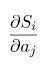   
https://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative/   
derivative of a softmax vector function is a vector of partial derivatives of its components.   
"In ML literature, the term "gradient" is commonly used to stand in for the derivative. Strictly speaking, gradients are only defined for scalar functions (such as loss functions in ML); for vector functions like softmax it's imprecise to talk about a 'gradient'"  
   
https://math.stackexchange.com/questions/945871/derivative-of-softmax-loss-function

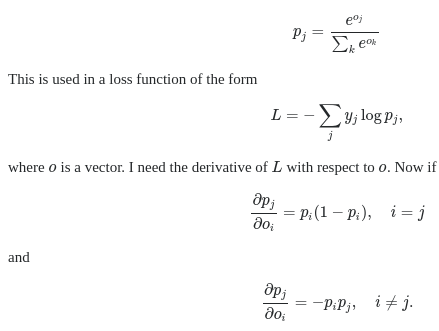

$$softmax'(x) = softmax(x)*(1 - softmax(x))$$

In [34]:
#-------------------------------------------------------------
# SOFTMAX
def softmax(x):
    assert isinstance(x, np.ndarray)
    exp = np.exp(x)
    return exp / np.sum(exp, axis=-1, keepdims=True)

# SOFTMAX_DERIVATIVE
def softmax_deriv(x):
    return softmax(x) * (1 - softmax(x))

#-------------------------------------------------------------

In [35]:
#-------------------------------------------------------------
def get_activation_fn(p_activ_fn_str):
    if p_activ_fn_str == "sigmoid":
        return lambda p_z: sigmoid(p_z)

    elif p_activ_fn_str == "softmax":
        return lambda p_z: softmax(p_z)
    
#-------------------------------------------------------------

In [36]:
import numpy as np

#-------------------------------------------------------------
# MODEL
class Model:
    def __init__(self, p_layers_lst, p_output_size_int):
        self.layers_lst      = p_layers_lst # :[:Layer]
        self.output_size_int = p_output_size_int

# LAYER
class Layer:
    def __init__(self, p_neurons_num_int, p_input_dim_int, p_activ_fn_str):
        self.neurons_num_int = p_neurons_num_int
        self.W = np.random.uniform(size = (p_neurons_num_int, p_input_dim_int), high=0.1, low=-0.1)
        
        # this is very important; 
        # size specifies only one dimension 
        # so numpy creates a vector; 
        # e.g. (3, 1) is still treated as a matrix and affects MUL
        # but (3, ) is a vector!
        # so the following is wrong
        # bias = np.random.uniform(low=low, high=high, size=(number_of_neurons, 1))
        # but this is correct:
        self.b = np.random.uniform(size = (p_neurons_num_int, ), high=0.1, low=-0.1)
        
        self.activation_fn = get_activation_fn(p_activ_fn_str)
        
        
#-------------------------------------------------------------
# MODEL_CREATE
def model__create(p_input_dim_int = 64):
    
    layers_lst                = []
    prev_layer_output_dim_int = p_input_dim_int
    
    for l in layers_specs_lst:
        
        neurons_num_int, activ_fn_str = l
        
        # NEW_LAYER
        input_dim_int = prev_layer_output_dim_int
        layer = Layer(neurons_num_int,
            input_dim_int,
            activ_fn_str)
        
        layers_lst.append(layer)
        
        # the number of outputs of each layer is equal to the 
        # number of neurons in that layer.
        prev_layer_output_dim_int = neurons_num_int
        
    model_output_size_int = layers_lst[-1].neurons_num_int
    model = Model(layers_lst, model_output_size_int)
    return model

#-------------------------------------------------------------


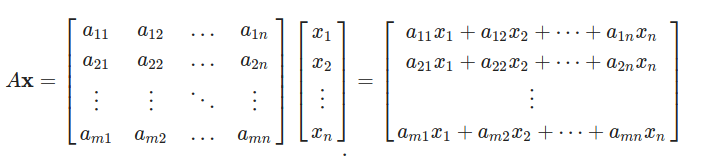  
W*x - is a dot-product, between "W" matrix and "x" vector

In [39]:

# p_x_input - is a 1D vector - (64, )
def model__forward(p_x_input,
    p_model,
    p_print_shapes_bool=False):
    
    # IMPORTANT!! - intermediate layer results are saved to be reused
    #               when doing back-propagation calculations.
    
    z__layers_out_lst = []
    y__layers_out_lst = []
    
    L_prev_output = p_x_input
    for i, l in enumerate(p_model.layers_lst):
        
        if p_print_shapes_bool:
            print("layer %s ---------------"%(i))
            print("W   shape - %s"%(str(l.W.shape)))
            print("L-1 shape - %s"%(str(L_prev_output.shape)))
            print("b   shape - %s"%(str(l.b.shape)))
        
        # input for this particular layer
        x = L_prev_output
        
        # z = W * x + b
        # .dot() - dot product
        #          multiplies two vectors and produces a scalar
        #          = x1*y1+x2*y2+...+xn*ym
        # 
        # W*x - https://mathinsight.org/matrix_vector_multiplication
        #       its a matrix-vector product.
        #       only for the case when the number of columns in A equals the number of rows in x.
        # W - columns number is equal to the rows number in "x".
        #     rows number is equal to the number of neurons.
        #     (neurons_num, input_dim)
        # W*x - column vector of dimension - (neurons_num, 1)
        # b   - column vector of dimension - (neurons_num, 1)
        # z   - column vector of dimension - (neurons_num, 1)
        z = np.dot(l.W, x) + l.b
        
        # activation - preserves dimension of "z"
        y = l.activation_fn(z)
        
        if p_print_shapes_bool:
            print("z   shape - %s"%(str(z.shape)))
            print("y   shape - %s"%(str(y.shape)))
            
        # CACHE_VALUES
        z__layers_out_lst.append(z)
        y__layers_out_lst.append(y)
        
        L_prev_output = y
        
    y_final = L_prev_output
    return y_final, z__layers_out_lst, y__layers_out_lst


model forward pass:
y: [0.10557318 0.10180025 0.08951577 0.08241272 0.0854482  0.09346602
 0.11725189 0.09807837 0.11338519 0.11306839]
y sum: 0.9999999999999999


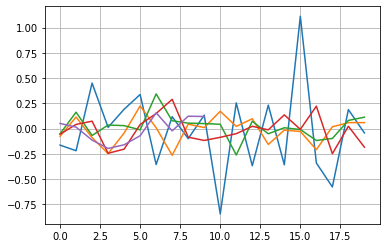

In [77]:

#----------------
# LAYERS
layers_specs_lst = [
    (20, "sigmoid"),
]
for i in range(0, 3):
    layers_specs_lst.append((20, "sigmoid"))
layers_specs_lst.append((10, "softmax"))
    
#----------------
    
# MODEL_CREATE
model = model__create(p_input_dim_int = 64)

# INPUT
x_input = X_test[0]

# MODEL_FORWARD
y, z__layers_out_lst, _ = model__forward(x_input, model, p_print_shapes_bool=False)

print("model forward pass:")
print("y:", y)
print("y sum:", sum(y))




import matplotlib.pyplot as plt
plt.grid(True)

for z in z__layers_out_lst:
    plt.plot(range(0,len(z)), z)
        

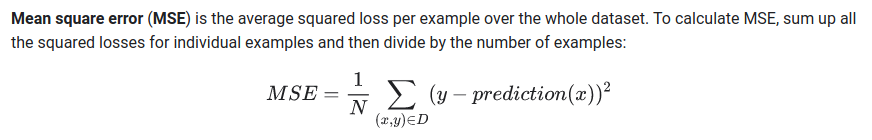



$y$       - predicted network output value  
$\hat{y}$ - true value  

$$\hat{y}=Wx+b$$

$$J=\sum_{i=0}^{C} (y_i-\hat{y_i})^2$$

$$J'=2(y-\hat{y})$$

In [73]:
def model__loss(p_y_pred, p_y_true):
    loss = np.sum((p_y_pred - p_y_true) ** 2)
    J    = loss
    return J

def model__loss_deriv(p_y_pred, p_y_true):
    J_deriv = 2 * (p_y_pred - p_y_true)
    return J_deriv




$J$          - error function  
$l$          - index of a particular layer  
$w_{i,j}$    - weight for the $i$-th neuron $j$-th input (in a layer $l$)  
$\normalsize\nabla_W J$ - nabla_JW  
$\nabla_b J$ - nabla_Jb  

$\odot$  
$\circ$  



$\frac{\partial J}{\partial w_{i,j}}$  
$\nabla_W J=\delta \circ x$  


$\large\delta_i^l = \frac{\partial J}{\partial z_i}$ - how much error $J$ depends on $z_i$. it exists for every neuron $i$ in every layer $l$.


$\large\frac{\partial z_i}{\partial w_{i,j}}=\frac{\partial \sum_{j} w_{i,j}x_j+b_i}{\partial w_{i,j}} = x_j \cdot 1 = x_j \tag{8}$


$\large\frac{\partial z_i}{\partial b_{i}}=\frac{\partial \sum_{j} w_{i,j}x_j+b_i}{\partial b_{i}} = 1 \tag{9}$  




$\large\frac{\partial y_i}{\partial z_i} = f'(z_i)\frac{\partial z_i}{\partial{z_i}} = f'(z_i) \cdot 1 = f'(z_i) \tag{10}$   
$\large\frac{\partial y_i}{\partial w_{i,j}} = f'(y_i)\frac{\partial z_i}{\partial w_{i,j}} = f'(y_i) x_j \cdot 1 = f'(y_i) x_j \tag{11}$

$\large\frac{\partial y_i}{\partial b_i} = f'(z_i)\frac{\partial z_i}{\partial b_i} = f'(z_i) \cdot 1 = f'(z_i) \tag{12}$




$\large z^{l+1}=W^{l+1}x^{l+1}+b^{l+1} \tag{13}$


$\large \frac{\partial z_i^{l+1}}{\partial z_i} = \frac{\partial \sum_j w_{i,j}^{l+1} x_j^{l+1} + b_i^{l+1}}{\partial z_i} = \frac{\partial \sum_j w_{i,j}^{l+1} f(z_j) + b_i^{l+1}}{\partial z_i} = w_{i,j}^{l+1} f'(z_i) \tag{14}$


In [87]:


def model__backprop(p_x_input,
    p_y_true,
    p_model,
    p_learning_rate_f=0.01):
    
    # FORWARD_PASS
    y_pred, z__layers_out_lst, y__layers_out_lst = model__forward(p_x_input, p_model, p_print_shapes_bool=False)
    
    
    
    delta_lst = []
    
    #-------------------------------------------------------------
    def last_layer_backprop():
        
        
        # LOSS
        loss = model__loss(y_pred, p_y_true)
        J    = loss

        # LOSS_DERIVATIVE
        J_deriv = model__loss_deriv(y_pred, p_y_true)
        print(J)
        print(J_deriv)
        
        
        
        z = z__layers_out_lst[-1]
        
        
        
    
        print("---------------------------")
        print(z)
        print(softmax_deriv(z))
        print("---------------------------")

        delta = J_deriv * softmax_deriv(z)
        delta_lst.append(delta)
        
        print("delta - %s"%(delta))

        # GRADIENTS
        nabla_JW = np.outer(delta, p_x_input)
        nabla_Jb = delta


        print(nabla_JW.shape)
        print(nabla_Jb.shape)
        
        # UPDATE_VARS
        layer      = p_model.layers_lst[-1]
        layer.W    = layer.W    - p_learning_rate_f * nabla_JW
        layer.bias = layer.bias - p_learning_rate_f * nabla_Jb
        
        
        
    #-------------------------------------------------------------
    def layer_backprop(p_layer,
        p_index_int):
        
            
            
            
        next_layer = p_model.layers_lst[p_index_int+1]
        assert isinstance(next_layer, Layer)
        
        
        
        
        
        # UPDATE_VARS
        p_layer.W    = p_layer.W    - p_learning_rate_f * nabla_JW
        p_layer.bias = p_layer.bias - p_learning_rate_f * nabla_Jb
        
        
        
        
    #-------------------------------------------------------------
    
    last_layer_backprop()
    
    
    
    remaining_layers_lst = reversed(enumerate(p_model.layers_lst[:-1]))
    for i, l in remaining_layers_lst:
        
        layer_backprop(l, i)

In [85]:
y_true = y_train[0]






model__backprop(x_input, y_true, model)

36.101359246884435
[-3.78885365 -3.7963995  -3.82096845 -3.83517456 -3.82910359 -3.81306795
 -3.76549621 -3.80384326 -3.77322961 -3.77386322]
---------------------------
[ 0.05092997  0.01453823 -0.1140595  -0.19673453 -0.16056395 -0.07087637
  0.15585021 -0.02270751  0.12231647  0.1195185 ]
[0.09442748 0.09143696 0.0815027  0.07562087 0.07814681 0.08473013
 0.10350389 0.088459   0.10052899 0.10028393]
---------------------------
delta - [-0.3577719  -0.34713123 -0.31141925 -0.29001922 -0.29923223 -0.32308173
 -0.3897435  -0.33648418 -0.37931897 -0.37845783]
(10, 64)
(10,)
